# Лабораторная работа №3. Синтез БИХ-фильтров.
Курс: лаборатория цифровой обработки сигналов, ФРКТ МФТИ
# Модуль 3. Метод инвариантной импульсной характеристики.

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [47]:
# %matplotlib notebook
# %matplotlib inline

Метод инвариантной импульсной характеристики относится к методам синтеза БИХ-фильтров на основе аналогового фильтра-прототипа. 

Он заключается в том, что импульсная характеристика аналогового фильтра ${{h}_{a}}(t)$ (реакция на дельта-функцию) дискретизуется с шагом $\Delta t = 1/f_\text{д}$, в результате чего получается импульсная характеристика цифрового фильтра: $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ 
 
Пусть $H(f)$ – частотная характеристика цифрового фильтра, ${{H}_{a}}(f)$– аналогового. Тогда в силу $h[k]=\Delta t\ {{h}_{a}}(k\Delta t)$ справедливо соотношение
$$H(f)=\sum\limits_{m=-\infty }^{\infty }{\ {{H}_{a}}}(f+m{{f}_{\text{д}}}.)$$
При этом появляется эффект наложения (элайзинг/алиасинг).


## Пример. Синтез на основе интегрирующей RC-цепи

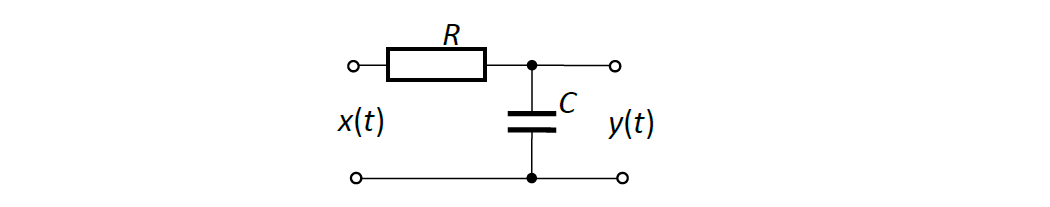

Ток, текущий через резистор, выражается через изменение напряжения на конденсаторе как 
$$i\left( t \right)\text{=}C\frac{dy(t)}{dt}.$$ 
Из закона Ома $$i(t)R\text{+ }y\left( t \right)=x\left( t \right).$$
$$RC\frac{dy(t)}{dt}\text{+ }y\left( t \right)=x\left( t \right).$$
Пусть $x(t)\overset{L}{\longleftrightarrow}X(p)$, $y(t)\overset{L}{\longleftrightarrow}Y(p)$. Тогда по свойствам преобразования Лапласа
$$\frac{dy(t)}{dt}\overset{L}{\longleftrightarrow}pY(p)-y(0)$$
Пусть в начальный момент времени $y(0)=0$. 
$$RCpY(p)+Y(p)=X(p).$$


Тогда передаточная функция аналогового фильтра имеет вид

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

In [48]:
RC=2*1e-4 # постоянная времени RC цепи

In [49]:
lti_RC=signal.lti([1], [RC, 1])
lti_RC

TransferFunctionContinuous(
array([5000.]),
array([1.e+00, 5.e+03]),
dt: None
)

In [50]:
signal.ZerosPolesGain(lti_RC)

ZerosPolesGainContinuous(
array([], dtype=float64),
array([-5000.]),
5000.0,
dt: None
)

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}=\underset{-1/RC}{\mathop{\text{Res}}}\,\frac{{{e}^{pt}}}{RC\left( p+\frac{1}{RC} \right)}=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$


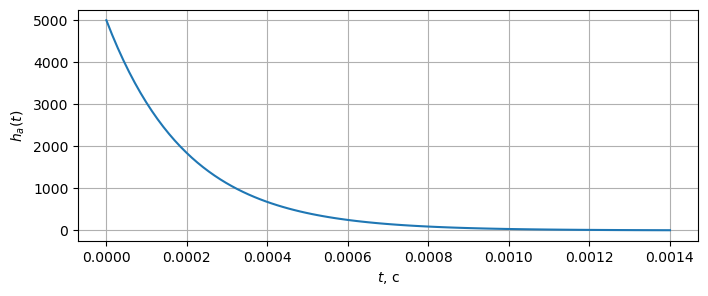

In [51]:
t, h_a = signal.impulse(lti_RC) # импульсная характеристика аналогового фильтра
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(t, h_a)
plt.xlabel("$t$, c")
plt.ylabel("$h_a(t)$")
plt.grid()

Частота среза RC-цепочки интегрирующего типа $f_c=\dfrac{1}{2\pi RC}$

In [52]:
1/(2*np.pi*RC) # Численное значение в Гц

795.7747154594767

In [53]:
w, H_a=signal.freqresp(lti_RC, w=np.linspace(-2*np.pi*3/(2*np.pi*RC), 2*np.pi*3/(2*np.pi*RC), 1024))

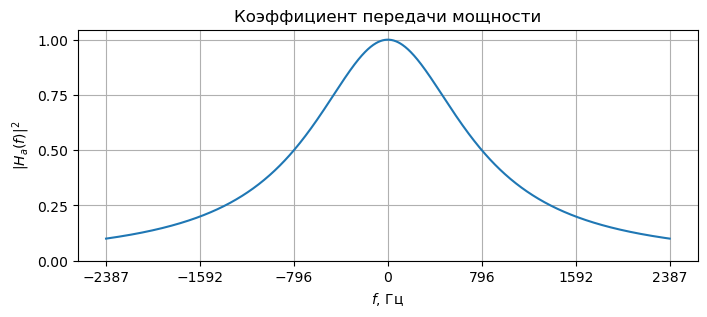

In [54]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a)**2)
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|^2$")
plt.title("Коэффициент передачи мощности")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(0, 1, 5))
plt.grid()

$$\dfrac{1}{\sqrt2}\approx 0,707$$

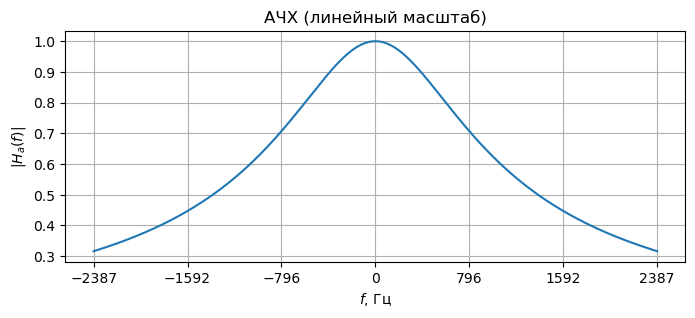

In [55]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), abs(H_a))
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.grid()

Для характеристик в дБ   

$20\log_{10}|H(f)|=10\log_{10}|H(f)|^2$

In [56]:
10*np.log10(0.5)

-3.010299956639812

In [57]:
20*np.log10(1/np.sqrt(2))

-3.0102999566398125

$10\log_{10}0.5\approx 20\log_{10} 0,707 \approx -3$ (дБ)

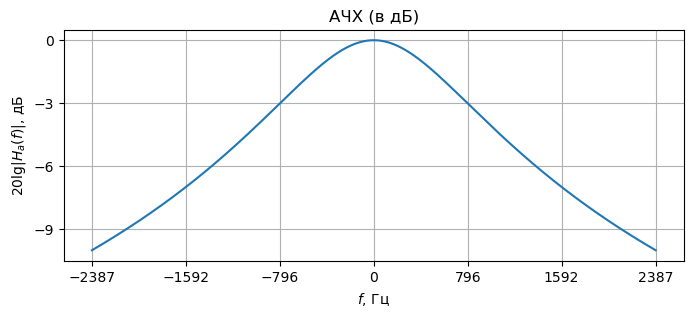

In [58]:
plt.figure(figsize=[8, 3], dpi=100)
plt.plot(w/(2*np.pi), 20*np.log10(abs(H_a)))
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (в дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.yticks(np.linspace(-9, 0, 4))
plt.grid()

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

Для аналогового фильтра импульсная характеристика может быть найдена с помощью обратного преобразования Лапласа для передаточной функции ${{H}_{a}}(p)$: 
$${{h}_{a}}(t)=\frac{1}{j2\pi }\oint\limits_{C}{{{H}_{a}}(p){{e}^{pt}}dp}=\underset{-1/RC}{\mathop{\text{Res}}}\,\frac{{{e}^{pt}}}{RC\left( p+\frac{1}{RC} \right)}=\frac{1}{RC}\exp \left( -\frac{t}{RC} \right),\,t\ge 0.$$


Дискретизуем импульсную характеристику с шагом $\Delta t$ так, что
$$h[k]=\Delta t\,{{h}_{a}}(k\Delta t)$$

$$h[k]=\frac{\Delta t}{RC}\exp \left( -\frac{k\Delta t}{RC} \right),\text{ }k\ge 0.$$

$\text{ }\!\!~\!\!\text{ }H(z)\text{ }\!\!~\!\!\text{ }=\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}h[k]\text{ }\!\!~\!\!\text{ }{{z}^{-k}}=\dfrac{\Delta t}{RC}\text{ }\!\!~\!\!\text{ }\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}\exp \left( -\dfrac{k\Delta t}{RC} \right){{z}^{-k}}=\dfrac{\Delta t}{RC}\sum\limits_{k=0}^{\infty }{\text{ }\!\!~\!\!\text{ }}{{\left( \exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}} \right)}^{k}}=\dfrac{\dfrac{\Delta t}{RC}}{1-\exp \left( -\dfrac{\Delta t}{RC} \right){{z}^{-1}}}$

$$y[k]=\frac{\Delta t}{RC}x[k]+\exp \left( -\frac{\Delta t}{RC} \right)y[k-1]$$

In [59]:
dt=RC/8
dt

2.5e-05

In [60]:
beta=[dt/RC, 0]
alpha=[1, -np.exp(-dt/RC)]
dlti_RC = signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.125, 0.   ]),
array([ 1.       , -0.8824969]),
dt: 2.5e-05
)

In [61]:
signal.ZerosPolesGain(dlti_RC)

ZerosPolesGainDiscrete(
array([0.]),
array([0.8824969]),
0.125,
dt: 2.5e-05
)

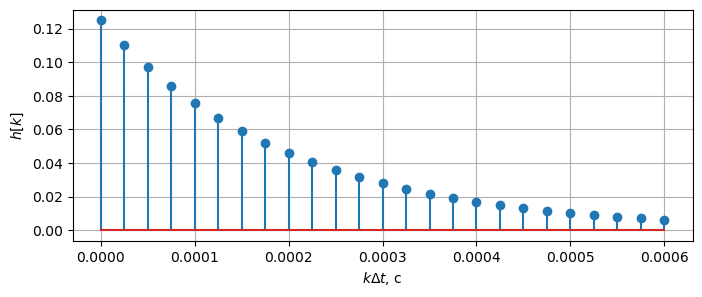

In [62]:
plt.figure(figsize=[8, 3], dpi=100)
t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h))
plt.xlabel("$k\Delta t$, c")
plt.ylabel("$h[k]$")
plt.grid()

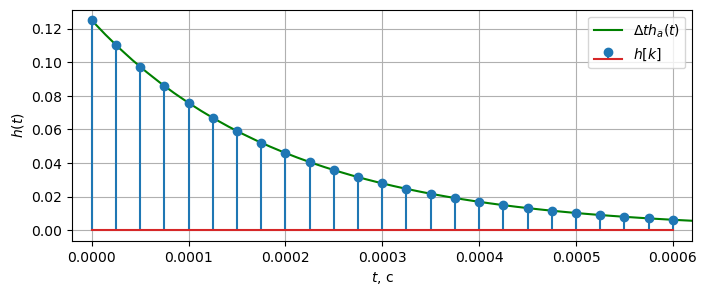

In [63]:
plt.figure(figsize=[8, 3], dpi=100)
t, h_a = signal.impulse(lti_RC)
plt.plot(t, dt*h_a, 'g', label="$\\Delta t h_a(t)$")

t, h = signal.dimpulse(dlti_RC, n=25)
plt.stem(t, np.squeeze(h), label="$h[k]$")

plt.legend()
plt.xlim([-0.00002, 0.00062])
plt.xlabel("$t$, c")
plt.ylabel("$h(t)$")
plt.grid()

In [64]:
1/(2*dt)

20000.0

In [65]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)

In [66]:
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

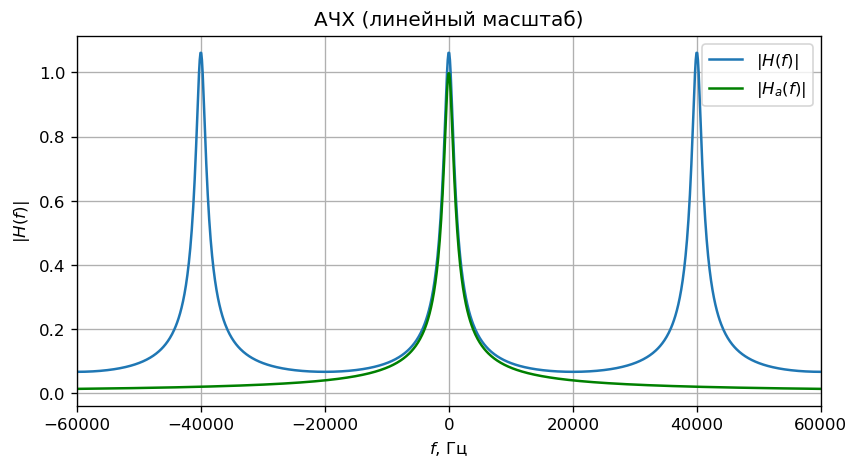

In [67]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()
plt.savefig("imp_inv.svg")

АЧХ цифрового фильтра и аналогового на интервале $[-f_д /2; f_д /2]$ незначительно отличаются и это отличие вызвано эффектом наложения отдельных копий АЧХ аналогового сигнала, сдвинутых на $f_д$.

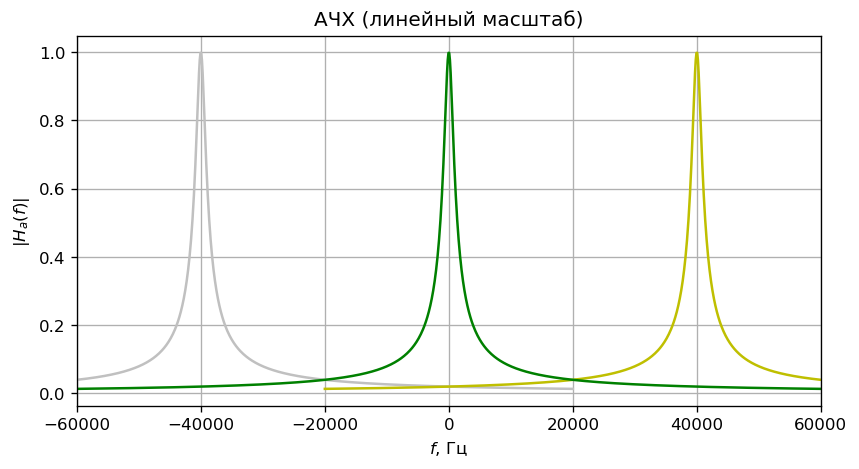

In [85]:
plt.figure(figsize=[8, 4], dpi=120)
#plt.plot(theta_d/(2*np.pi*dt), abs(H_d))
plt.plot(w_a/(2*np.pi)-(1/dt), abs(H_a), "silver")
plt.plot(w_a/(2*np.pi)+(1/dt), abs(H_a), "y")
plt.plot(w_a/(2*np.pi), abs(H_a), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H_a(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.grid()

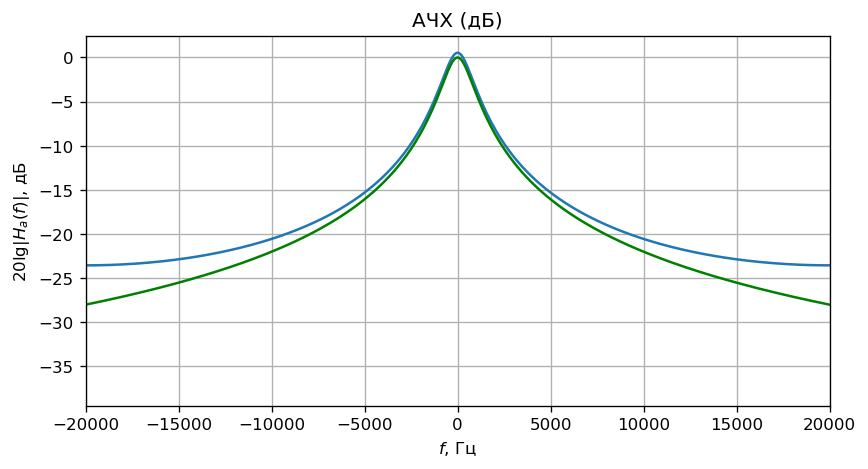

In [69]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)))
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.grid()

## Метод билинейного z-преобразования (сравнение)

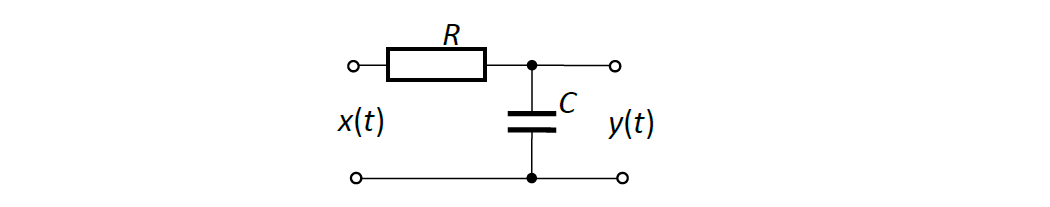

$${{H}_{a}}(p)=\frac{Y(p)}{X(p)}=\frac{1}{1+RCp}=\frac{1}{RC\left( p+\frac{1}{RC} \right)}.$$

$$p=\frac{2}{\Delta t}\cdot \frac{z-1}{z+1}=\frac{2}{\Delta t}\cdot \frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}$$

$$H(z)=\frac{1}{1+\frac{2RC}{\Delta t}\frac{1-{{z}^{-1}}}{1+{{z}^{-1}}}}=\frac{1+{{z}^{-1}}}{1+{{z}^{-1}}+\frac{2RC}{\Delta t}-\frac{2RC}{\Delta t}{{z}^{-1}}}=\frac{1+{{z}^{-1}}}{\left( 1+\frac{2RC}{\Delta t} \right)+{{z}^{-1}}\left( 1-\frac{2RC}{\Delta t} \right)}$$

In [70]:
beta=[1, 1]
alpha=[(1+2*RC/dt), (1-2*RC/dt)]
dlti_RC=signal.dlti(beta, alpha, dt=dt)
dlti_RC

TransferFunctionDiscrete(
array([0.05882353, 0.05882353]),
array([ 1.        , -0.88235294]),
dt: 2.5e-05
)

In [71]:
signal.ZerosPolesGain(dlti_RC)

ZerosPolesGainDiscrete(
array([-1.]),
array([0.88235294]),
0.058823529411764705,
dt: 2.5e-05
)

In [72]:
w_a, H_a=signal.freqresp(lti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024)/dt)

In [73]:
theta_d, H_d=signal.dfreqresp(dlti_RC, w=np.linspace(-3*np.pi, 3*np.pi, 1024))

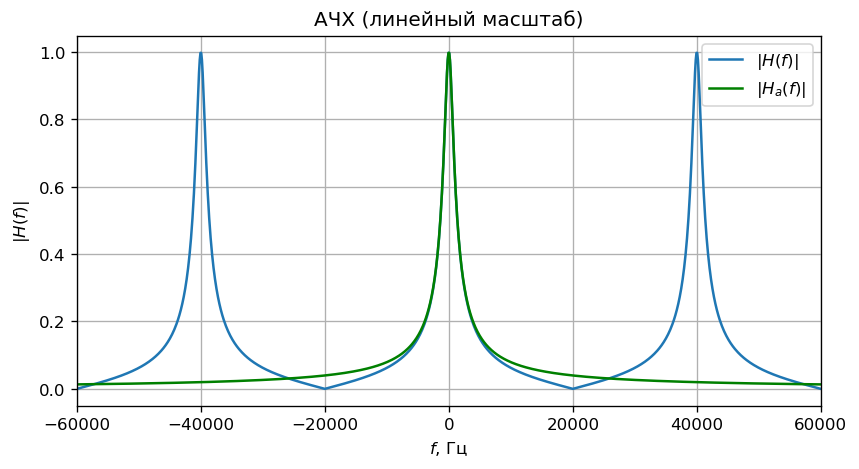

In [74]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), abs(H_d), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), abs(H_a), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$|H(f)|$")
plt.title("АЧХ (линейный масштаб)")
plt.xlim([-1.5/dt, 1.5/dt])
plt.legend(loc='upper right')
plt.grid()

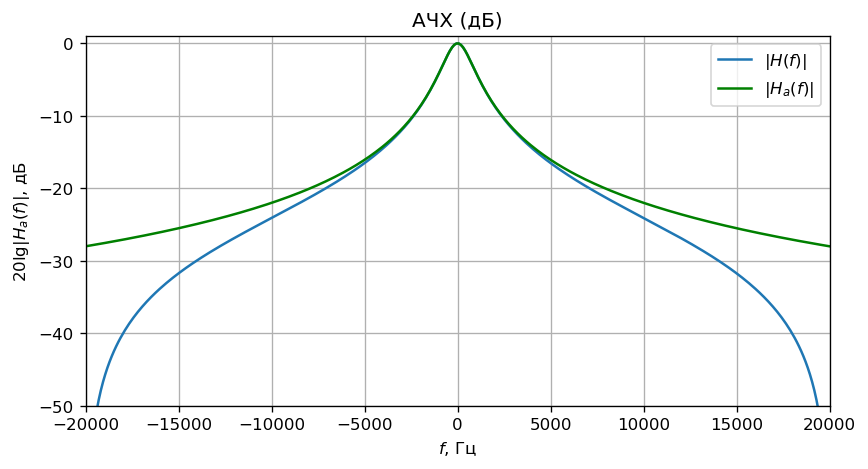

In [75]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), label="$|H(f)|$")
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g", label="$|H_a(f)|$")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xlim([-0.5/dt, 0.5/dt])
plt.ylim([-50, 1])
plt.legend(loc='upper right')
plt.grid()

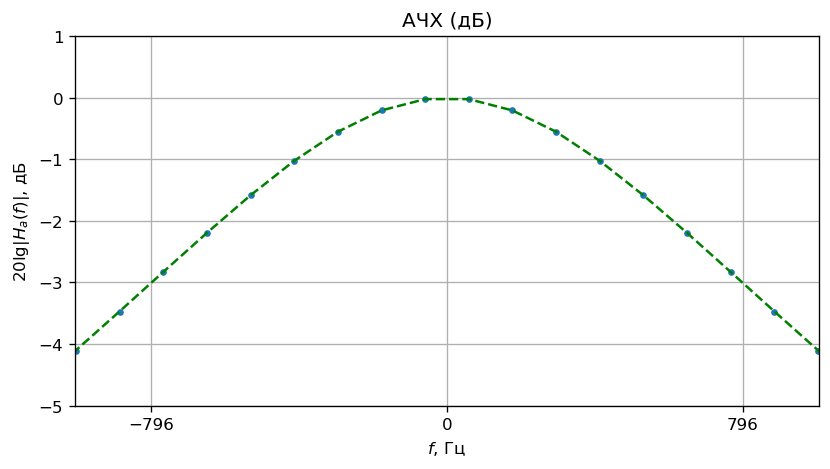

In [76]:
plt.figure(figsize=[8, 4], dpi=120)
plt.plot(theta_d/(2*np.pi*dt), 20*np.log10(abs(H_d)), '.')
plt.plot(w_a/(2*np.pi), 20*np.log10(abs(H_a)), "g--")
plt.xlabel("$f$, Гц")
plt.ylabel("$20 \lg |H_a(f)|$, дБ")
plt.title("АЧХ (дБ)")
plt.xticks([u/(2*np.pi*RC) for u in range(-3, 4, 1)])
plt.xlim([-1000, 1000])
plt.ylim([-5, 1])
plt.grid()

$${{\theta }_{0}}=2\text{acrtg}\left( \frac{{{\omega }_{a}}\Delta t}{2} \right)+2\pi n,\text{ }n\in Z.$$

$$f_0=\dfrac{1}{\pi\Delta t}\text{acrtg}\left( {\pi f_a \Delta t} \right)+2\pi n,\text{ }n\in Z.$$

In [77]:
fc=1/(2*np.pi*RC)
fc

795.7747154594767

In [78]:
np.arctan(np.pi*fc*dt)/(dt*np.pi)

794.7409722216336

$$2\pi f_0 = \omega_0 (рад/с)$$

$$2\pi f_0 / f_Д= \theta_0 (рад)$$

$$2\pi \nu_0 =  \theta_0 (рад)$$

$$\nu_0 =  f_0 / f_Д$$

# Пример. Фильтра Баттерворта [2 c. 484]

Синтезируем методом инвариантной импульсной характеристики на основе фильтра Баттерворта цифровой фильтр нижних частот, удовлетворяющий следующим требованиям 
* частота дискретизации $f_{д}=1000$ Гц
* граничная частота полосы пропускания $f_1=100$ Гц,
* граничная частота полосы задерживания $f_2=150$ Гц,
* максимальное допустимое затухание в полосе пропускания $a_\text{max}=1$ дБ ($\delta_1=0.89125$),
* минимальное допустимое затухание в полосе задерживания $a_\text{min}=15$ дБ  ($\delta_2=0.17783$).


In [79]:
fs = 1000
f1 = 100
f2 = 150
delta1 = 0.89125
delta2 = 0.17783

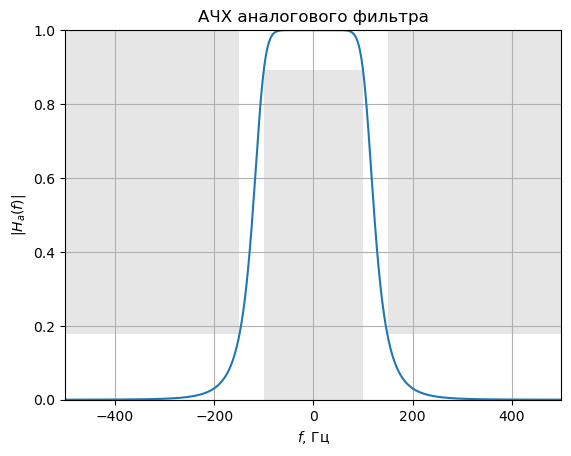

In [80]:
plt.figure()
def butterworth_resp(f, fc, N):
    return np.sqrt(1.0/(1+(f/fc)**(2*N)))

fc = 112
N=6
f = np.linspace(-500, 500, 2**12)
H = [butterworth_resp(fn, fc, N) for fn in f]


plt.fill([-f1,-f1, f1, f1], [0, delta1, delta1, 0], '0.9', lw=0)
plt.fill([-fs/2,-fs/2, -f2, -f2], [delta2, 1, 1, delta2], '0.9', lw=0)
plt.fill([fs/2, fs/2, f2, f2], [delta2, 1, 1, delta2], '0.9', lw=0)
plt.ylim([0, 1])
plt.xlim([-fs/2, fs/2])
plt.plot(f, H)
plt.title('АЧХ аналогового фильтра')
plt.xlabel('$f$, Гц')
plt.ylabel('$|H_a(f)|$')
plt.grid()

АЧХ аналогового фильтра Баттерворта 
$${\left| H_a(f) \right|}=\frac{1}{\sqrt{1+{{\left( \frac{f }{{{f }_{c}}} \right)}^{2N}}}}$$

* Требования к АЧХ можно записать в виде

$0,89125 \le |H_a(f)| \le 1$ при $0 \le f \le f_1$;

$|H_a(f)| \le 0,17783$ при $f_2 \le f \le f_д/2$.

* В силу монотонности АЧХ можно требовать выполнения неравенств

$0,89125 \le |H_a(f_1)|$;

$|H_a(f_2)| \le 0,17783$.

* Предельном случае

$0,89125 = |H_a(f_1)|$;

$|H_a(f_2)| = 0,17783$.

$$1+{{\left( \frac{{{f}_{1}}}{{{f}_{c}}} \right)}^{2N}}=\frac{1}{{{0,89125}^{2}}}$$

$$1+{{\left( \frac{{{f}_{2}}}{{{f}_{c}}} \right)}^{2N}}=\frac{1}{{{0,17783}^{2}}}$$



Система из этих уравнений разрешима при $N=5,8858$. Однако $N$ - порядок фильтра - натуральное число. Округлением вверх находим $N=6$ и $f_c = 112,2$ Гц.

In [81]:
z, p, k = signal.butter(N=6, Wn=112.2, btype='low', analog=True, output='zpk')

z =  []
p =  [ -29.03949686+108.37687771j  -79.33738085 +79.33738085j
 -108.37687771 +29.03949686j -108.37687771 -29.03949686j
  -79.33738085 -79.33738085j  -29.03949686-108.37687771j]
k =  1995065421633.7515


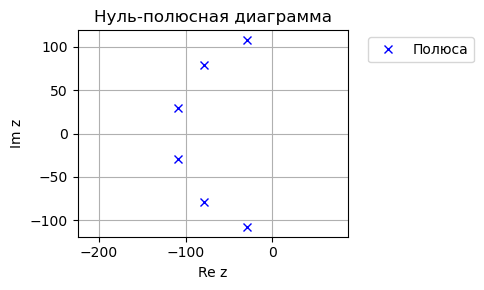

In [82]:
print("z = ", z)
print("p = ", p)
print("k = ", k)
q = np.linspace(0, 2*np.pi, 401)

fig=plt.figure(figsize=[5, 3])
ax = fig.add_subplot(111)
plt.plot(p.real, p.imag, 'bx', label='Полюса')
plt.grid()
ax.set_aspect(aspect='equal', adjustable='datalim')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, numpoints=1)
plt.title("Нуль-полюсная диаграмма")
plt.xlabel("Re z")
plt.ylabel("Im z")
plt.tight_layout()
plt.show()

Полюса в левой полуплоскости, значит аналоговый фильтр устойчив. Заметим, что у фильтра три пары однократных комплексно-сопряженных полюсов. Далее можем воспользоваться соотношением, полученным в лекции, и определить передаточную функцию цифрового фильтра.

$${{H}_{a}}(p)=\sum\limits_{m=1}^{M}{\frac{{{A}_{m}}}{p-{{p}_{m}}}},$$
$$H(z)=\sum\limits_{m=1}^{M}{\frac{{{A}_{m}}\Delta t}{1-\exp ({{p}_{m}}\Delta t){{z}^{-1}}}}.$$


## Список литературы
[1] Солонина А. И. Цифровая обработка сигналов в зеркале MATLAB: учеб. пособие. — СПб.: БХВ-Петербург, 2021. — 560 с.: ил. — (Учебная литература для вузов)

[2] Оппенгейм, А.Цифровая обработка сигналов : [учеб. пособие для вузов] = Discrete-Time Signal Processing / А. Оппенгейм, Р. Шафер ; пер. с англ. под ред. С. Ф. Боева 3-е изд., испр. Москва : Техносфера, 2019 1048 с.(Мир радиоэлектроники). - Библиогр.: с. 1027-1043.  (книга доступна из сети МФТИ https://reader.lanbook.com/book/73524)
